In [31]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

# <b>Importing the Dataset

In [3]:
df = pd.read_csv("/Users/developer/Documents/Current Project/Python/Dataset/Retail and wherehouse Sale.csv")
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0


# <b> Primary Analysis of Dataset

In [4]:
df.isnull().sum()

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

<p> Creating a new dataset after dropping nul values</p>

In [5]:
dfMod = df.dropna()

In [6]:
dfMod.shape

(29967, 9)

In [7]:
dfMod.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [8]:
dfMod.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,29967.0,29967.000000,29967.000000,29967.000000,29967.000000
mean,2020.0,3.911403,6.814945,6.597148,27.506121
std,0.0,2.836790,28.750487,27.893590,272.242434
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.910000,3.000000,6.000000
max,2020.0,9.000000,1482.170000,1507.000000,18317.000000


In [9]:
dfMod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29967 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              29967 non-null  int64  
 1   MONTH             29967 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         29967 non-null  object 
 4   ITEM DESCRIPTION  29967 non-null  object 
 5   ITEM TYPE         29967 non-null  object 
 6   RETAIL SALES      29967 non-null  float64
 7   RETAIL TRANSFERS  29967 non-null  float64
 8   WAREHOUSE SALES   29967 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.3+ MB


<p>Creating a boxplot to analyse the distribution of values values in REATIL SALE, RETAIL TRANSFER, WAREHOUSE SALES.</p>

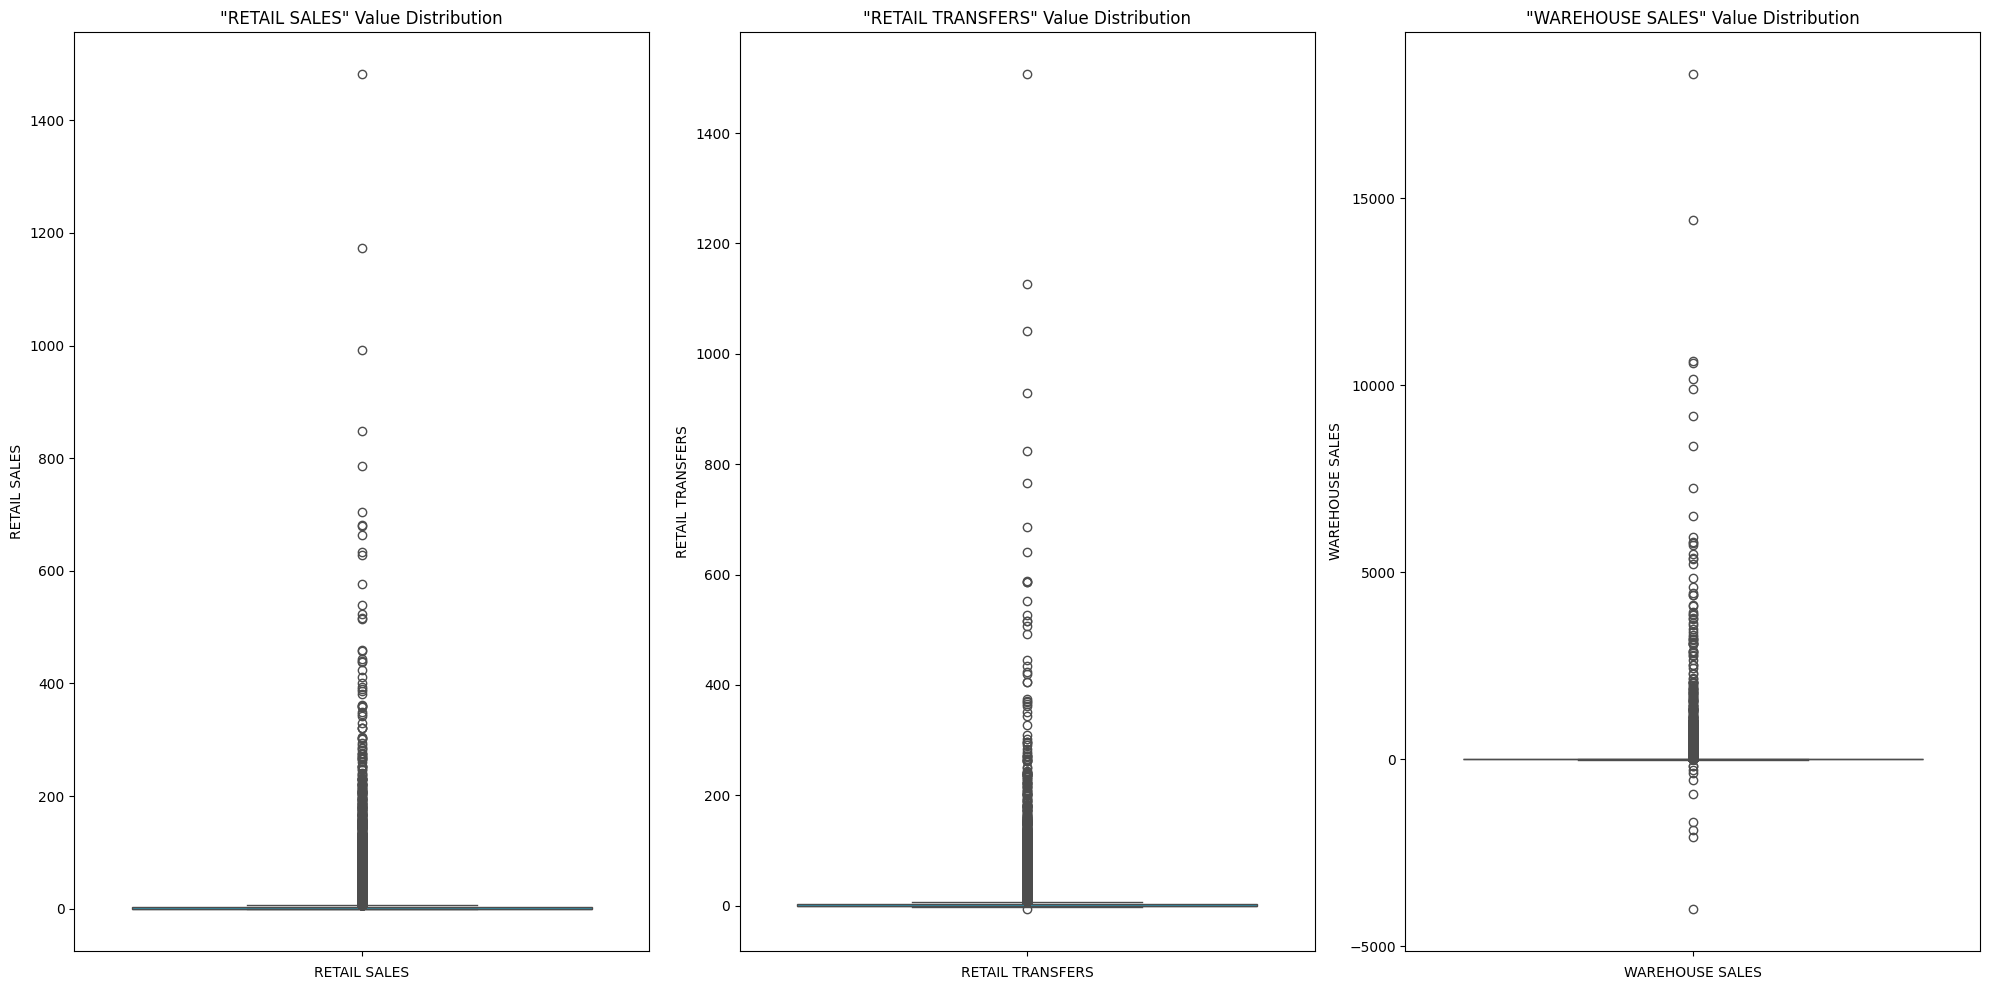

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot(dfMod['RETAIL SALES'], color="#00C8FF")
plt.title("\"RETAIL SALES\" Value Distribution")
plt.xlabel("RETAIL SALES")

plt.subplot(1,3,2)
sns.boxplot(dfMod['RETAIL TRANSFERS'], color="#00C8FF")
plt.title("\"RETAIL TRANSFERS\" Value Distribution")
plt.xlabel("RETAIL TRANSFERS")

plt.subplot(1,3,3)
sns.boxplot(dfMod['WAREHOUSE SALES'], color="#00C8FF")
plt.title("\"WAREHOUSE SALES\" Value Distribution")
plt.xlabel("WAREHOUSE SALES")

plt.tight_layout()
plt.show()

In [11]:
dfMod[(dfMod['RETAIL SALES']==0)].shape

(13682, 9)

In [12]:
agg_df_Momsales = dfMod.groupby('MONTH').agg(
    monthy_retail_sales = ("RETAIL SALES", "sum"),
    monthy_retail_transfers = ("RETAIL TRANSFERS", "sum"),
    monthy_warehouse_sales = ("WAREHOUSE SALES", "sum")
) # Creating a dataframethat contain month-wise sales. 

In [13]:
agg_df_Momsales

,monthy_retail_sales,monthy_retail_transfers,monthy_warehouse_sales
MONTH,,,
1,73731.60,75931.35,285231.72
3,33920.24,34485.08,113307.22
7,91766.60,82667.57,418320.42
9,4805.02,4612.74,7416.57


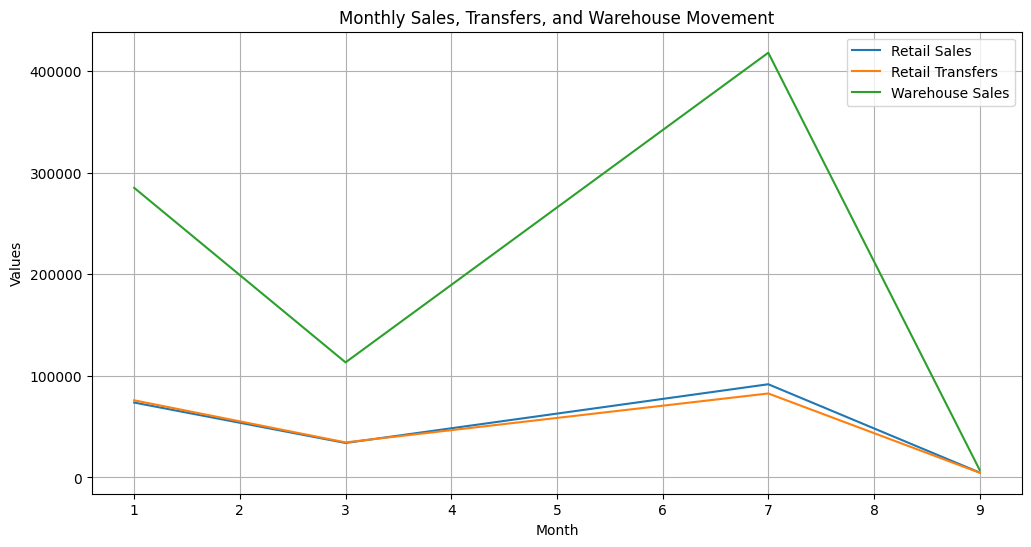

In [14]:
agg_df_Momsales = agg_df_Momsales.sort_index()

plt.figure(figsize=(12, 6))

plt.plot(agg_df_Momsales.index, agg_df_Momsales['monthy_retail_sales'], label='Retail Sales')
plt.plot(agg_df_Momsales.index, agg_df_Momsales['monthy_retail_transfers'], label='Retail Transfers')
plt.plot(agg_df_Momsales.index, agg_df_Momsales['monthy_warehouse_sales'], label='Warehouse Sales')

plt.title('Monthly Sales, Transfers, and Warehouse Movement')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# <b>Category Analysis

In [15]:
itemType_agg = dfMod.groupby('ITEM TYPE').agg(
    yearly_retail_sales = ("RETAIL SALES", "sum"),
    yearly_retail_transfers = ("RETAIL TRANSFERS", "sum"),
    yearly_warehouse_sales = ("WAREHOUSE SALES", "sum")    
)

In [16]:
itemType_agg

,yearly_retail_sales,yearly_retail_transfers,yearly_warehouse_sales
ITEM TYPE,,,
BEER,59538.76,55729.83,697279.68
DUNNAGE,0.00,0.00,-12099.00
KEGS,0.00,0.00,8400.00
LIQUOR,81742.85,79599.70,8796.90
NON-ALCOHOL,2982.62,2934.08,2438.42
REF,46.27,34.00,0.00
STR_SUPPLIES,224.12,770.00,0.00
WINE,59688.84,58629.13,119459.93


<Figure size 1000x500 with 0 Axes>

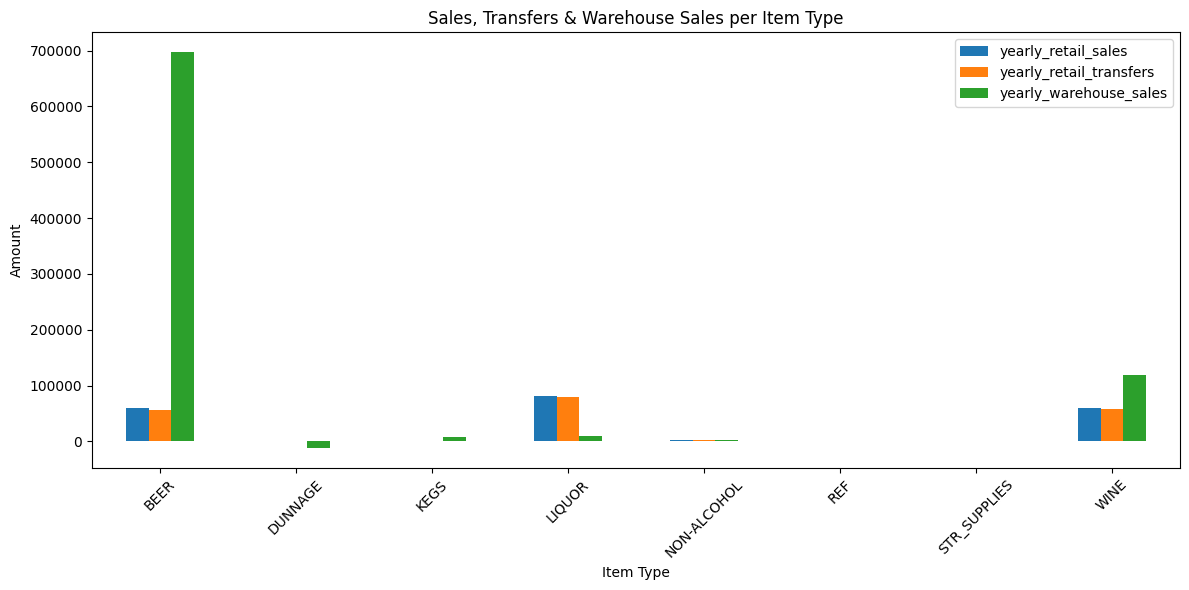

In [17]:
plt.figure(figsize=(10,5))

df_plot = itemType_agg[['yearly_retail_sales', 
              'yearly_retail_transfers', 
              'yearly_warehouse_sales']]

ax = df_plot.plot(kind='bar', figsize=(12,6))

plt.title("Sales, Transfers & Warehouse Sales per Item Type")
plt.xlabel("Item Type")
plt.ylabel("Amount")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>1. Key Findings </b><br>

<b>1.1 Beer</b><br>
<ul>
    <li>Yearly Retail Sales: 59538.76</li>
    <li>Yearly Retail Transfers: 55729.83</li>
    <li>Yearly Warehouse Sales: 697279.68</li>
</ul><br>
Insight:<br>
<br>
BEER is the strongest contributor to warehouse-based revenue, indicating substantial B2B or bulk-order demand. High transfer volumes also suggest frequent restocking needs at retail locations, reflecting strong consumer demand.<br>
<br>
Implication:<br>
<br>
This category should remain a top priority for inventory allocation, forecasting, and promotional strategies.
<br>
<br>
Operational Efficiency Recommendations:<br>
<br>
BEER need higher warehouse stock because they drive large warehouse sales.
</font></p>

1.2 Liquor<br>
<ul>
    <li>Yearly Retail Sales: 81742.85</li>
    <li>Yearly Retail Transfers: 79599.70</li>
    <li>Yearly Warehouse Sales: 8796.90</li>
</ul><br>
Insight:<br>
<br>
Liquor performs strongly in retail environments indicating strong corridor demand but underutilizes the warehouse sales channel indicating that warehouses may not be focusing on liquor distribution.<br>
<br>
Implication:<br>
<br>
Expanding warehouse-level distribution for liquor could unlock new revenue streams and improve overall profitability.
<br>
<br>
Operational Efficiency Recommendations:<br>
<br>
Expand warehouse distribution of Liquor. Shift some stock to warehouse to meet potential B2B demand; liquor has margin potential.
</font></p>

1.3 Wine<br> 		
<ul>
    <li>Yearly Retail Sales: 59688.84</li>
    <li>Yearly Retail Transfers: 58629.13</li>
    <li>Yearly Warehouse Sales: 119459.93</li>
</ul><br>
Insight:<br>
<br>
Wine demonstrates healthy and balanced performance across all three channels. Both retail and warehouse movements indicate stable demand.
<br>
<br>
Implication:<br>
<br>
Consistent demand makes this an ideal category for targeted marketing and premium upsell strategies.

1.4 Non-Alcohol<br>
<ul>
    <li>Yearly Retail Sales: 2982.63</li>
    <li>Yearly Retail Transfers: 2934.30</li>
    <li>Yearly Warehouse Sales: 2438.93</li>
</ul><br>
Insight:<br><br>
Non-alcohol items show steady but low sales across all channels. They serve mainly as complementary products rather than major revenue drivers.<br><br>

Implication:<br><br>
Consider bundling these items with alcoholic beverages (e.g., mixers + liquor combos) to improve basket value.
</font></p>

1.5 Kegs<br>
<ul>
    <li>Yearly Retail Sales: 0</li>
    <li>Yearly Retail Transfers: 0</li>
    <li>Yearly Warehouse Sales: 8400</li>
</ul><br>
Insight:<br><br>
Kegs show activity only in warehouse sales, suggesting they are used primarily for B2B or bulk distribution rather than retail consumption.<br><br>

Implication:<br><br>
Evaluate whether retail outlets should offer kegs or keep them as a warehouse-exclusive product based on demand analysis.
</font></p>

1.6 Dunnage<br>
<ul>
    <li>Yearly Retail Sales: 0</li>
    <li>Yearly Retail Transfers: 0</li>
    <li>Yearly Warehouse Sales: -12099</li>
</ul><br>
Insight:<br><br>
Negative warehouse sales indicate potential issues such as returns, damaged stock write-offs, or accounting discrepancies.<br><br>

Implication:<br><br>
Immediate audit recommended to identify loss sources and correct warehouse handling or return processes.
</font></p>

1.7 Ref<br>
<ul>
    <li>Yearly Retail Sales: 46.27</li>
    <li>Yearly Retail Transfers: 34</li>
    <li>Yearly Warehouse Sales: 0</li>
</ul><br>
Insight:<br><br>
REF shows extremely low movement, which may indicate low demand, mispricing, or a classification issue.<br><br>

Implication:<br><br>
Assess product relevance; consider rebranding, repricing, or discontinuation if the category does not contribute meaningfully.
</font></p>

1.8 STR_SUPPLIES<br>
<ul>
    <li>Yearly Retail Sales: 57.66</li>
    <li>Yearly Retail Transfers: 53.53</li>
    <li>Yearly Warehouse Sales: 0</li>
</ul><br>
Insight:<br><br>
Store supplies generate minimal movement and do not contribute significantly to revenue.<br><br>

Implication:<br><br>
Maintain only essential stock levels to reduce holding costs and prevent unnecessary inventory accumulation.
</font></p>

# <b>Supplier Analysis

In [18]:
supplier_agg = dfMod.groupby('SUPPLIER').agg(
    total_retail_sales = ("RETAIL SALES", "sum"),
    total_retail_transfers = ("RETAIL TRANSFERS", "sum"),
    total_warehouse_sales = ("WAREHOUSE SALES", "sum")
)

In [28]:
supplier_agg['transfer_ratio'] = supplier_agg['total_retail_transfers'] / (
    supplier_agg['total_retail_sales'] + supplier_agg['total_warehouse_sales']
).replace(0, 1)
supplier_agg.head()

,total_retail_sales,total_retail_transfers,total_warehouse_sales,total_sales,transfer_ratio
SUPPLIER,,,,,
A I G WINE & SPIRITS,0.00,0.0,26.0,26.00,0.000000
ADAMBA IMPORTS INTL,6.07,6.0,1.0,13.07,0.848656
AIKO IMPORTERS INC,0.08,0.0,1.0,1.08,0.000000
ALLAGASH BREWING COMPANY,61.65,62.0,847.0,970.65,0.068233
ALLIED IMPORTERS USA LTD,0.00,1.0,1.0,2.00,1.000000


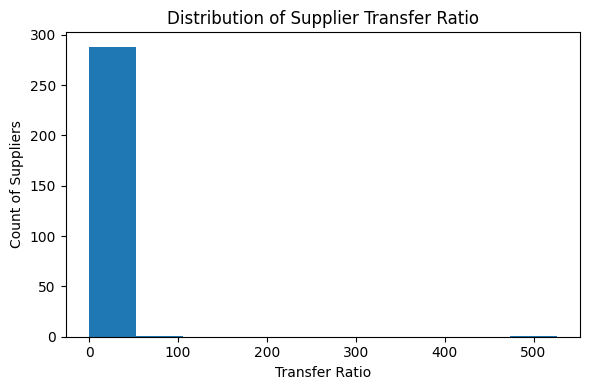

In [29]:
plt.figure(figsize=(6, 4))
plt.hist(supplier_agg['transfer_ratio'])
plt.title("Distribution of Supplier Transfer Ratio")
plt.xlabel("Transfer Ratio")
plt.ylabel("Count of Suppliers")
plt.tight_layout()
plt.show()

2.1 Transfer Ratio Distribution<br>
<ul>
    <li>Most suppliers have a transfer ratio below 1, meaning they rely more on warehouse shipments than transfers.</li>
</ul><br>
Insight:<br><br>
Suppliers with high transfer ratios may suffer from:<br><br>
<ul>
    <li>poor initial allocation</li>
    <li>unstable or unpredictable demand</li>
    <li>stockouts requiring inter-store transfers</li>
</ul><br>
These suppliers increase operational costs.
<br><br>
Remedy:<br><br>
Focus inventory planning and warehouse space accordingly.
</font></p>

2.2 Volume Concentration<br><br>

<ul>
    <li>A small number of suppliers contribute the majority of retail, transfer, and warehouse volume.</li>
    <li>Median values are very low, but maximum values are extremely high, indicating heavy skew.</li>
</ul><br>

Insight:<br><br>

The business is heavily dependent on a few high-volume suppliers, creating concentration risk.<br><br>

<ul>
    <li>High-volume suppliers drive the majority of inventory movement.</li>
    <li>They require stronger planning and service-level monitoring.</li>
</ul><br>

Remedy:<br><br>

<ul>
    <li>Perform focused reviews on top-volume suppliers.</li>
    <li>Use Pareto analysis (80/20 rule) to prioritize planning resources.</li>
    <li>Monitor strategic suppliers more frequently for supply chain risk.</li>
</ul><br><br>

2.3 Data Quality – Negative Warehouse Sales<br><br>

<ul>
    <li>Negative warehouse sales values were detected (e.g., -9,620).</li>
    <li>These typically indicate returns, posting corrections, or data quality issues.</li>
</ul><br>

Insight:<br><br>

Incorrect or inconsistent data can distort KPIs, forecasting, and supplier performance evaluation.<br><br>

Remedy:<br><br>

<ul>
    <li>Investigate all negative entries to identify root causes.</li>
    <li>Implement validation rules to prevent erroneous postings.</li>
    <li>Use reason codes for returns and adjustments to ensure traceability.</li>
</ul><br><br>